In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

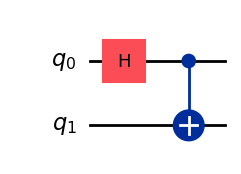

In [2]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.

qc.draw("mpl")

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(channel="ibm_quantum", token="233e6bd6c0e52e1a925af51fa200686316f098dcd5f47950e5c7cfe31ae49ff3035b55dee8d22a42ab603e28756c10d0cf91d4563984dcb3cac14aefe6134b52")
 

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="233e6bd6c0e52e1a925af51fa200686316f098dcd5f47950e5c7cfe31ae49ff3035b55dee8d22a42ab603e28756c10d0cf91d4563984dcb3cac14aefe6134b52",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

### Test your setup. Run a simple circuit using Sampler to ensure that your environment is set up properly:

In [13]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
 
# Create empty circuit
example_circuit = QuantumCircuit(2)
example_circuit.measure_all()
 
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)

sampler = Sampler(backend)
job = sampler.run([example_circuit])

print(f"job id: {job.job_id()}")
result = job.result()
print(result)



job id: ctrtwbh907y0008ws72g
PrimitiveResult([PubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


In [18]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(channel="ibm_cloud", token="<IBM Cloud API key>", instance="<IBM Cloud CRN>")

ApiException: Error: Provided API key could not be found., Status code: 400

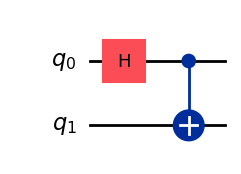

In [19]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [20]:
# Set up six different observables.
from qiskit.quantum_info import SparsePauliOp
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

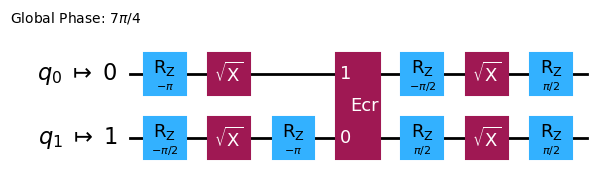

In [22]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# If you did not previously save your credentials, use the following line instead:
# service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw('mpl', idle_wires=False)

In [23]:
# Construct the Estimator instance.
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: ctrw4qj4gzyg008zykd0


In [26]:
job.result()

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'shots': 5024, 'target_precision': 0.01414213562373095, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})], metadata={'dynamical_decoupling': {'enable': False, 'sequence_type': 'XX', 'extra_slack_distribution': 'middle', 'scheduling_method': 'alap'}, 'twirling': {'enable_gates': False, 'enable_measure': True, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto', 'interleave_randomizations': True, 'strategy': 'active-accum'}, 'resilience': {'measure_mitigation': True, 'zne_mitigation': False, 'pec_mitigation': False}, 'version': 2})

# Q-KMEANS

In [26]:
# import math lib
from math import pi

# import Qiskit
from qiskit_aer import Aer

from qiskit import IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram


ImportError: cannot import name 'IBMQ' from 'qiskit' (c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\qiskit\__init__.py)

In [5]:
import qiskit

In [8]:
from qiskit import providers

In [13]:
pip install --upgrade qiskit


   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB 1.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.3/4.1 MB 4.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.1 MB 7.0 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/4.1 MB 7.3 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/4.1 MB 7.3 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/4.1 MB 7.3 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/4.1 MB 7.3 MB/s eta 0:00:01
   ------------ --------------------------- 1.2/4.1 MB 3.6 MB/s eta 0:00:01
   ----------------- ---------------------- 1.8/4.1 MB 4.5 MB/s eta 0:00:01
   -------------------- ------------------- 2.1/4.1 MB 4.9 MB/s eta 0:00:01
   -------------------- ------------------- 2.1/4.1 MB 4.9 MB/s eta 0:00:01
   -------------------- ------------------- 2.1/4.1 MB 4.9 MB/s eta 0:00:01
   ----------------

  You can safely remove it manually.


In [15]:
pip install qiskit-aer


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB 960.0 kB/s eta 0:00:10
   -- ------------------------------------- 0.6/9.5 MB 7.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.5 MB 10.3 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.5 MB 11.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.5 MB 12.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.5 MB 13.5 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.5 MB 13.8 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.5 MB 14.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.3/9.5 MB 14.1 MB/s eta 0:00:01
   ------------------------- -------------- 6.1/9.5 MB 14.4 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.5 MB 14.1 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.5 MB 13.8 MB/s eta 0:00:01
   ----

In [21]:
from qiskit import providers 